In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
class Accelerometer():
    def __init__(self):
        self.mean_x = 0.048526
        self.mean_y = 0.000759
        self.mean_z = -9.717405
        self.std_x  = 0.011822
        self.std_y  = 0.011932
        self.std_z  = 0.020968

    def get_measurement(self):
        x = np.random.normal(self.mean_x, self.std_x)
        y = np.random.normal(self.mean_y, self.std_y)
        z = np.random.normal(self.mean_z, self.std_z)

        return np.array([x, y, z])
    
class Gyroscope():
    def __init__(self):
        self.mean_x = 0.000051
        self.mean_y = -0.000152
        self.mean_z = -0.000009
        self.std_x  = 0.000638
        self.std_y  = 0.000766
        self.std_z  = 0.000638

    def get_measurement(self):
        x = np.random.normal(self.mean_x, self.std_x)
        y = np.random.normal(self.mean_y, self.std_y)
        z = np.random.normal(self.mean_z, self.std_z)

        return np.array([x, y, z])

acc = Accelerometer()
gyro = Gyroscope()

In [211]:
initial_orientation = [0, 0, 0] # RPY

acc_estimate = []
for _ in range(100000):
    acc_measurement = acc.get_measurement()
    roll = np.arccos(acc_measurement[1]/np.linalg.norm(acc_measurement)) - np.pi/2
    pitch = np.arccos(acc_measurement[0]/np.linalg.norm(acc_measurement)) - np.pi/2

    acc_estimate.append(np.array([roll, pitch]))

acc_estimate = np.array(acc_estimate)


gyro_estimate = []
dt = 1/400
roll = pitch = 0
for _ in range(100000):
    gyro_measurement = gyro.get_measurement()
    roll  += gyro_measurement[0]*dt
    pitch += gyro_measurement[1]*dt
    gyro_estimate.append(np.array([roll, pitch]))

gyro_estimate = np.array(gyro_estimate)

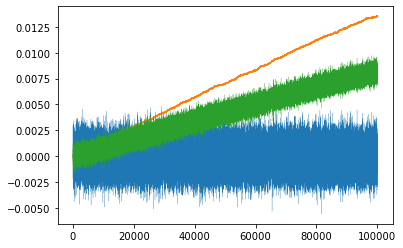

In [217]:
alpha = 0.6
filtered_estimate = alpha*gyro_estimate + (1-alpha)*acc_estimate
plt.plot(acc_estimate[:,0], linewidth = 0.2)
plt.plot(gyro_estimate[:,0])
plt.plot(filtered_estimate[:,0], linewidth = 0.2)

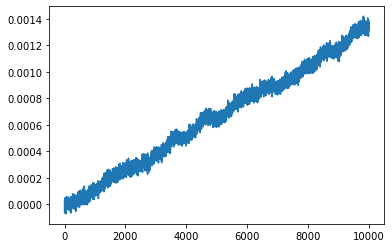